Dataset Head:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Summary Statistics:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   4

<Figure size 640x480 with 0 Axes>

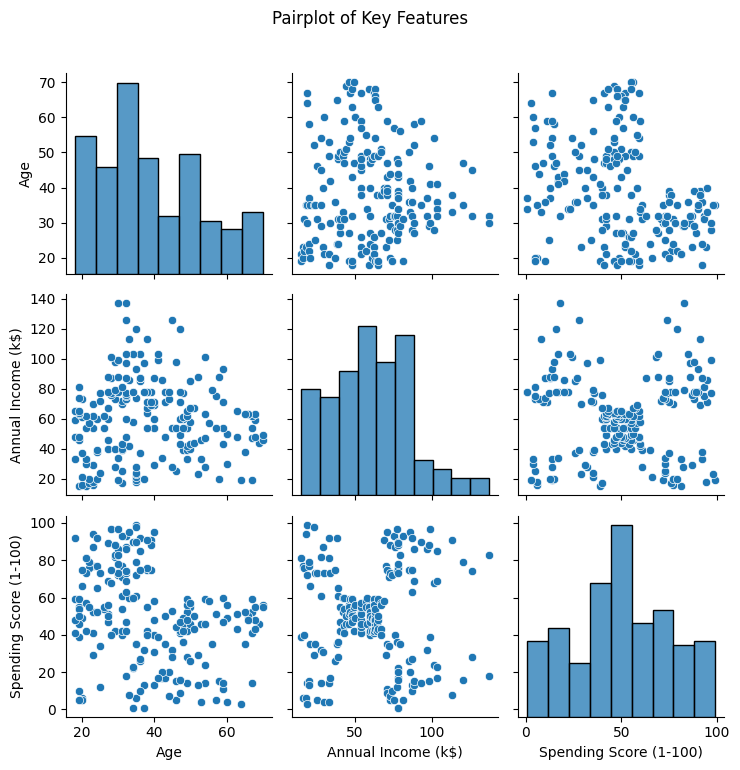

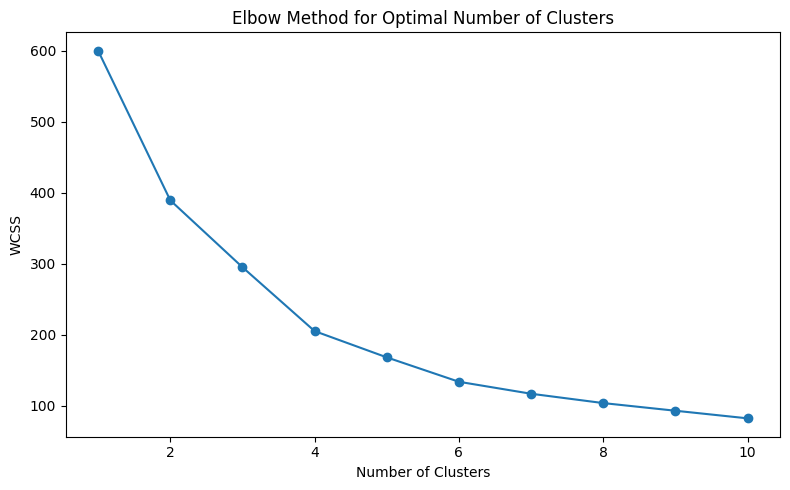

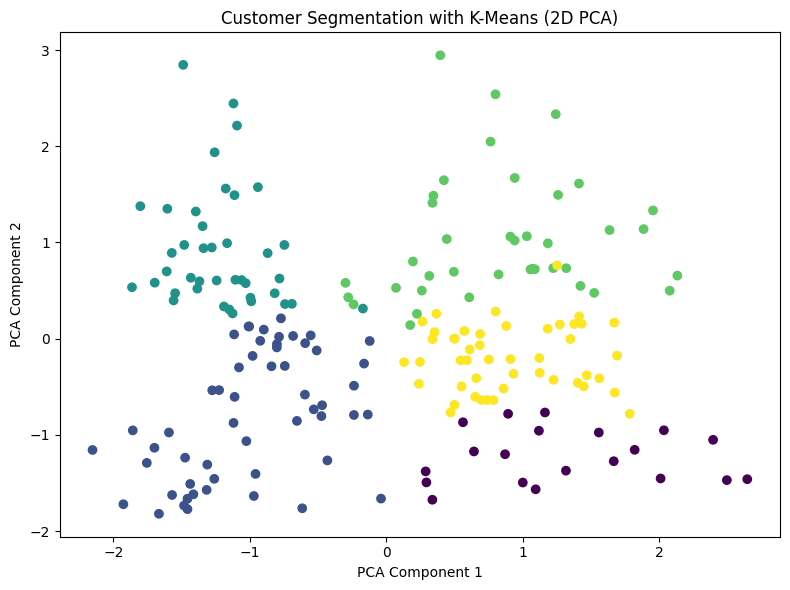

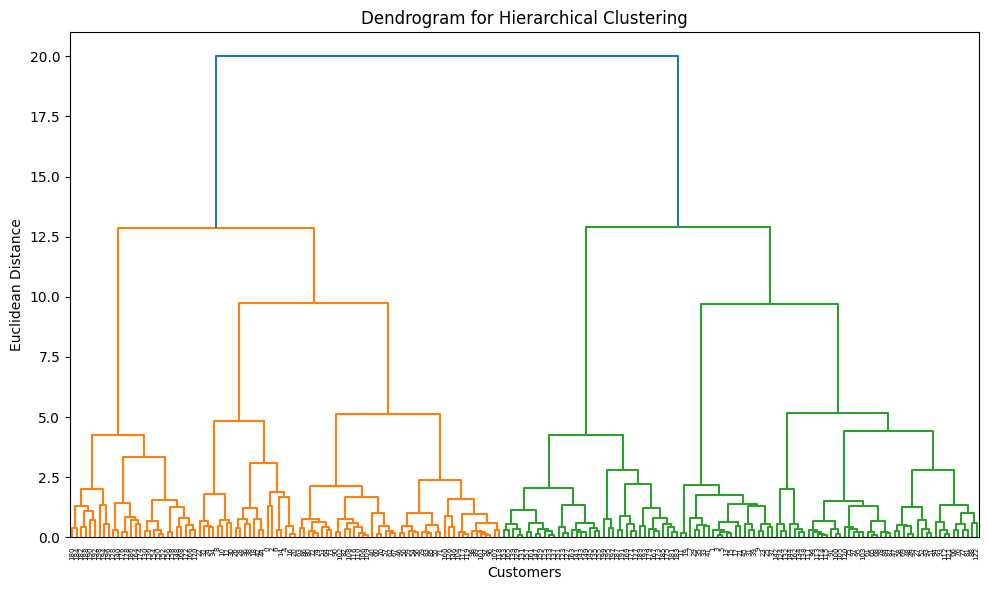

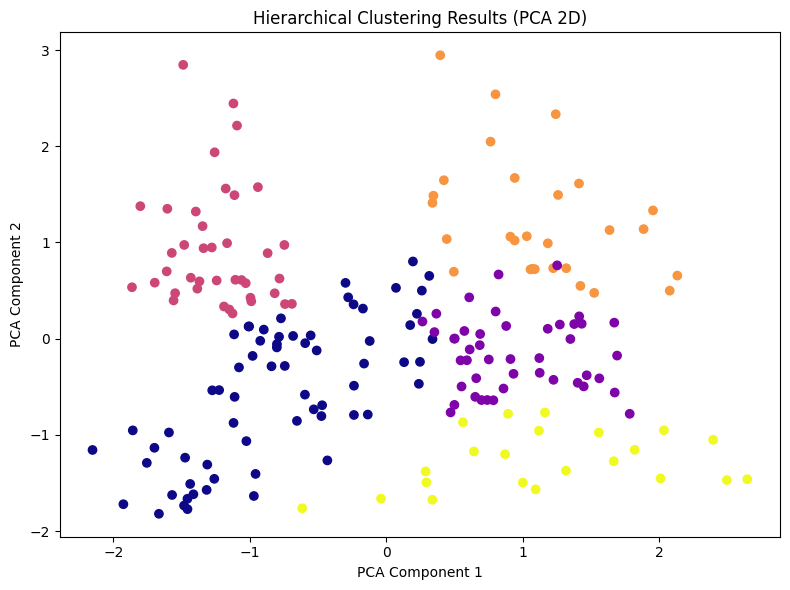


Cluster Summaries (K-Means):

Cluster 0 Summary:
Age                       46.25
Annual Income (k$)        26.75
Spending Score (1-100)    18.35
dtype: float64

Cluster 1 Summary:
Age                       25.185185
Annual Income (k$)        41.092593
Spending Score (1-100)    62.240741
dtype: float64

Cluster 2 Summary:
Age                       32.875
Annual Income (k$)        86.100
Spending Score (1-100)    81.525
dtype: float64

Cluster 3 Summary:
Age                       39.871795
Annual Income (k$)        86.102564
Spending Score (1-100)    19.358974
dtype: float64

Cluster 4 Summary:
Age                       55.638298
Annual Income (k$)        54.382979
Spending Score (1-100)    48.851064
dtype: float64


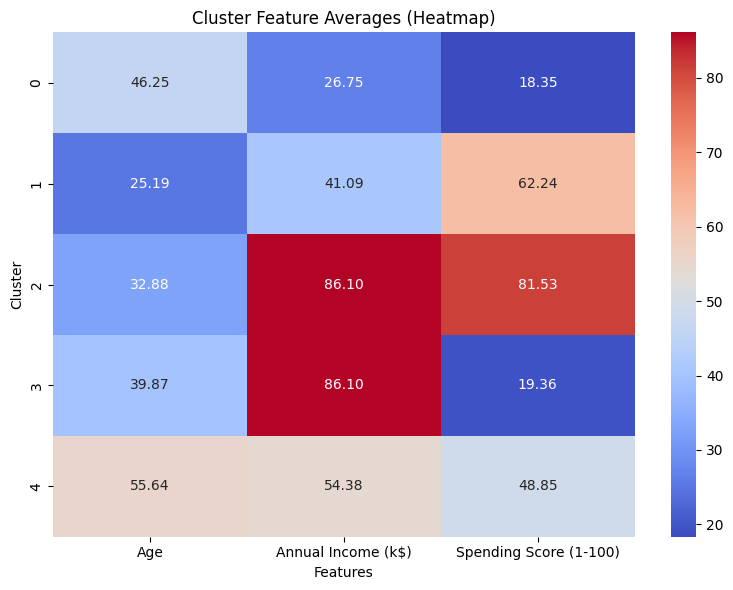

In [7]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Mall_customer_segmentation/Mall_Customers.csv')

# ================================
# 1. Exploratory Data Analysis (EDA)
# ================================
print("Dataset Head:")
print(df.head())

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

# Pairplot to understand distributions
plt.figure()
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.tight_layout()
plt.show()

# ================================
# 2. Data Preprocessing
# ================================
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

# ================================
# 3. K-Means Clustering
# ================================

# Elbow Method to determine optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10, max_iter=300)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.tight_layout()
plt.show()

# Apply K-Means with 5 clusters (assumed optimal from elbow)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42, n_init=10, max_iter=300)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize Clusters with PCA (2D)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Customer Segmentation with K-Means (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.tight_layout()
plt.show()

# ================================
# 4. Hierarchical Clustering
# ================================
linked = linkage(scaled_data, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.tight_layout()
plt.show()

# Apply Agglomerative Clustering
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
df['Hierarchical_Cluster'] = hierarchical.fit_predict(scaled_data)

# Visualize hierarchical clusters (PCA 2D)
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['Hierarchical_Cluster'], cmap='plasma')
plt.title('Hierarchical Clustering Results (PCA 2D)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.tight_layout()
plt.show()

# ================================
# 5. Cluster Summary
# ================================
print("\nCluster Summaries (K-Means):")
for cluster in sorted(df['Cluster'].unique()):
    summary = df[df['Cluster'] == cluster][features].mean()
    print(f"\nCluster {cluster} Summary:\n{summary}")



# ================================
# 6. Heatmap of Cluster Centroids (Bonus Visualization)
# ================================
cluster_means = df.groupby('Cluster')[features].mean()

plt.figure(figsize=(8, 6))
sns.heatmap(cluster_means, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Cluster Feature Averages (Heatmap)")
plt.xlabel("Features")
plt.ylabel("Cluster")
plt.tight_layout()
plt.show()


# ================================
# 7. 3D Scatter Plot (Bonus Visualization)
# ================================
fig = px.scatter_3d(df,
                    x='Age',
                    y='Annual Income (k$)',
                    z='Spending Score (1-100)',
                    color='Cluster',
                    symbol='Gender',
                    title='3D Customer Segmentation Visualization (K-Means)',
                    opacity=0.7)
fig.show()